In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pwd

/Users/malte.luecken/helmholtz_munich/benchmarking_data_integration/scib-reproducibility/notebooks/analysis


In [3]:
files = !ls ../../../Paper/202109_kBET_fix/Supplementary\ Files/Results/*.csv

In [4]:
data = {file:pd.read_csv(file) for file in files}

In [5]:
data[files[0]]

,Unnamed: 0,Method,Output,Features,Scaling,Overall Score,Batch Correction,PCR batch,Batch ASW,graph iLISI,...,Bio conservation,NMI cluster/label,ARI cluster/label,Cell type ASW,isolated label F1,isolated label silhouette,graph cLISI,CC conservation,HVG conservation,trajectory conservation
0,319,scGen*,gene,HVG,unscaled,0.667406,0.619712,0.593345,0.841671,0.106118,...,0.699201,0.904241,0.849627,0.675813,0.155460,0.391633,1.000000,0.491212,0.416649,0.925860
1,43,Scanorama,embed,HVG,scaled,0.641593,0.677942,0.901327,0.955880,0.107809,...,0.617360,0.637543,0.540902,0.501580,0.159606,0.438662,0.967787,0.706393,NaN,0.888212
2,235,scVI,embed,HVG,unscaled,0.636712,0.620568,0.870668,0.917481,0.078631,...,0.647474,0.687811,0.544036,0.518036,0.183759,0.457020,0.988365,0.569934,NaN,0.934886
3,247,scANVI*,embed,HVG,unscaled,0.627515,0.589593,0.799600,0.891219,0.068181,...,0.652797,0.746849,0.612477,0.569162,0.076483,0.441384,0.996387,0.652344,NaN,0.905722
4,320,scGen*,gene,FULL,unscaled,0.625399,0.605967,0.594643,0.829299,0.090718,...,0.638353,0.900034,0.849291,0.665508,0.155627,0.417719,1.000000,0.413542,0.237884,0.661730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,91,Seurat v3 CCA,gene,HVG,scaled,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,92,Seurat v3 CCA,gene,FULL,scaled,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,175,trVAE,embed,HVG,unscaled,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,176,trVAE,embed,FULL,unscaled,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Concatenate all metrics tasks

In [6]:
merged = pd.concat(data.values())

In [7]:
merged.columns

Index(['Unnamed: 0', 'Method', 'Output', 'Features', 'Scaling',
       'Overall Score', 'Batch Correction', 'PCR batch', 'Batch ASW',
       'graph iLISI', 'graph connectivity', 'kBET', 'Bio conservation',
       'NMI cluster/label', 'ARI cluster/label', 'Cell type ASW',
       'isolated label F1', 'isolated label silhouette', 'graph cLISI',
       'CC conservation', 'HVG conservation', 'trajectory conservation'],
      dtype='object')

In [8]:
#Drop NA results
merged = merged.loc[~np.isnan(merged['Overall Score']),:]

In [9]:
#Drop non-metrics columns
merged = merged.drop(columns=['Unnamed: 0', 'Method', 'Output', 'Features', 'Scaling',
       'Overall Score', 'Batch Correction', 'Bio conservation'])

In [10]:
merged

,PCR batch,Batch ASW,graph iLISI,graph connectivity,kBET,NMI cluster/label,ARI cluster/label,Cell type ASW,isolated label F1,isolated label silhouette,graph cLISI,CC conservation,HVG conservation,trajectory conservation
0,0.593345,0.841671,0.106118,0.973149,0.215315,0.904241,0.849627,0.675813,0.155460,0.391633,1.000000,0.491212,0.416649,0.925860
1,0.901327,0.955880,0.107809,0.902712,0.137193,0.637543,0.540902,0.501580,0.159606,0.438662,0.967787,0.706393,NaN,0.888212
2,0.870668,0.917481,0.078631,0.951633,0.065287,0.687811,0.544036,0.518036,0.183759,0.457020,0.988365,0.569934,NaN,0.934886
3,0.799600,0.891219,0.068181,0.963966,0.060845,0.746849,0.612477,0.569162,0.076483,0.441384,0.996387,0.652344,NaN,0.905722
4,0.594643,0.829299,0.090718,0.977288,0.214376,0.900034,0.849291,0.665508,0.155627,0.417719,1.000000,0.413542,0.237884,0.661730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,NaN,NaN,0.278785,1.000000,0.048844,0.165141,0.088985,NaN,0.398508,NaN,0.889310,NaN,NaN,NaN
61,0.000000,0.699457,0.159569,0.687123,0.001258,0.136133,0.077083,0.393583,0.358264,0.399749,0.897569,NaN,NaN,NaN
62,0.000000,0.699453,0.159467,0.687123,0.001289,0.137155,0.068634,0.393583,0.318718,0.399749,0.898244,NaN,0.084446,NaN
63,0.000000,0.652234,0.159430,0.530993,0.000000,0.133741,0.028885,0.384295,0.297224,0.389249,0.919573,NaN,0.266496,NaN


# Create correlation plot

In [11]:
metrics_corr = merged.corr()

In [12]:
metrics_corr

,PCR batch,Batch ASW,graph iLISI,graph connectivity,kBET,NMI cluster/label,ARI cluster/label,Cell type ASW,isolated label F1,isolated label silhouette,graph cLISI,CC conservation,HVG conservation,trajectory conservation
PCR batch,1.000000,0.331122,0.406834,0.444798,0.372828,0.160400,0.238390,0.231394,0.075092,0.189542,-0.070974,-0.119309,-0.390054,0.015774
Batch ASW,0.331122,1.000000,0.272741,0.527670,0.100500,0.299812,0.411750,-0.039637,0.116796,0.071489,-0.043810,0.252487,-0.306226,0.507494
graph iLISI,0.406834,0.272741,1.000000,0.138166,0.557387,0.248565,0.413852,0.242245,0.009832,0.094040,-0.356293,-0.078332,-0.120983,-0.097422
graph connectivity,0.444798,0.527670,0.138166,1.000000,0.204702,0.540565,0.553644,0.499058,0.359219,0.332030,0.145386,0.112868,-0.163913,0.591004
kBET,0.372828,0.100500,0.557387,0.204702,1.000000,0.196616,0.288628,0.216060,-0.012458,0.146992,-0.108883,-0.260801,-0.153734,-0.090170
NMI cluster/label,0.160400,0.299812,0.248565,0.540565,0.196616,1.000000,0.934524,0.662472,0.321535,0.297020,0.365586,0.292469,0.138845,0.474055
ARI cluster/label,0.238390,0.411750,0.413852,0.553644,0.288628,0.934524,1.000000,0.594561,0.236879,0.318365,0.225693,0.211427,0.034850,0.427448
Cell type ASW,0.231394,-0.039637,0.242245,0.499058,0.216060,0.662472,0.594561,1.000000,0.413699,0.412222,0.527967,-0.053541,0.099033,0.336569
isolated label F1,0.075092,0.116796,0.009832,0.359219,-0.012458,0.321535,0.236879,0.413699,1.000000,0.263311,0.226035,-0.028445,0.039893,0.294267
isolated label silhouette,0.189542,0.071489,0.094040,0.332030,0.146992,0.297020,0.318365,0.412222,0.263311,1.000000,0.175761,0.063280,-0.059251,0.374652


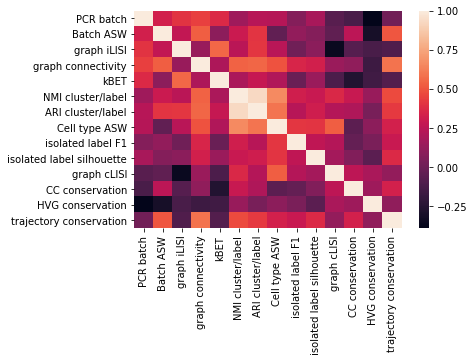

In [13]:
sns.heatmap(metrics_corr)

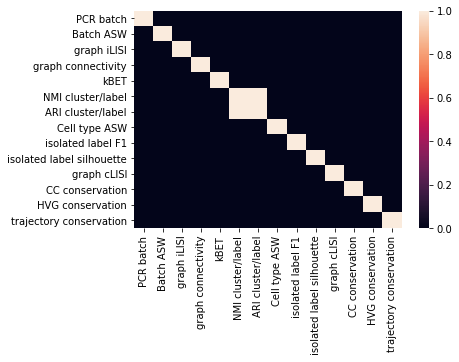

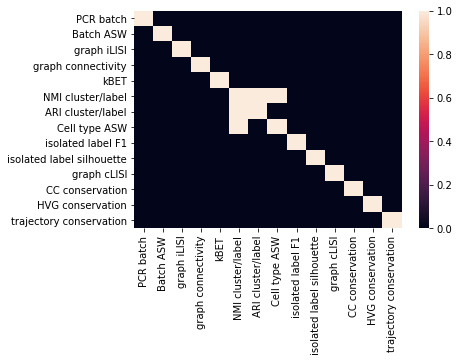

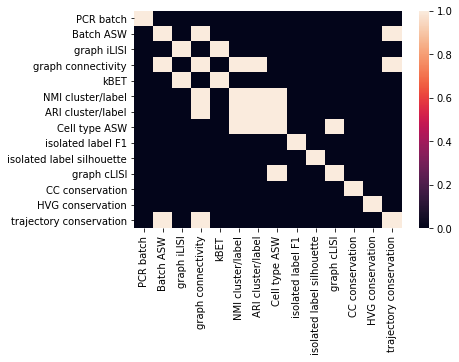

In [14]:
sns.heatmap(metrics_corr > 0.7)
plt.show()

sns.heatmap(metrics_corr > 0.6)
plt.show()

sns.heatmap(metrics_corr > 0.5)
plt.show()

Correlation results:
- Only NMI/ARI cluster/label are closely correlated (pearson R=0.93) in RNA and simulation tasks
  - this is likely the most important assessment of bio conservation, thus double metric means it is up-weighted, which may be relevant
- Cell type ASW correlated with cluster NMI score at 0.66, but this gives different info as shown in FastMNN HVG/scaled results on mouse brain

# Effective range of metrics

In [15]:
merged.describe()

,PCR batch,Batch ASW,graph iLISI,graph connectivity,kBET,NMI cluster/label,ARI cluster/label,Cell type ASW,isolated label F1,isolated label silhouette,graph cLISI,CC conservation,HVG conservation,trajectory conservation
count,393.000000,387.000000,441.000000,441.000000,402.000000,441.000000,441.000000,387.000000,441.000000,387.000000,441.000000,275.000000,196.000000,131.000000
mean,0.775596,0.829402,0.206436,0.889148,0.260492,0.682717,0.556948,0.570263,0.528840,0.514701,0.969414,0.599518,0.299479,0.720470
std,0.285108,0.115297,0.161236,0.155362,0.197918,0.219118,0.298838,0.093518,0.344618,0.094947,0.061170,0.180447,0.193214,0.211714
min,0.000000,0.313182,0.000000,0.323046,0.000000,0.007093,0.002259,0.239947,0.013652,0.030170,0.610511,0.126080,0.029739,0.000000
25%,0.695873,0.781814,0.072440,0.862307,0.079650,0.568383,0.314839,0.515435,0.155627,0.470133,0.972888,0.485211,0.160003,0.550943
50%,0.901297,0.859637,0.168905,0.958838,0.253280,0.690388,0.511049,0.565820,0.544499,0.514672,0.994329,0.612019,0.276955,0.826601
75%,0.962123,0.903650,0.327411,0.986991,0.387275,0.861368,0.864552,0.627630,0.844135,0.562418,1.000000,0.734078,0.377617,0.864579
max,1.000000,0.992010,0.593243,1.000000,0.962638,1.000000,1.000000,0.865885,1.000000,0.890196,1.000000,1.000000,1.000000,0.977800


Smallest range is cLISI from 0.61-1.0, with smallest effective range of 0.03 in 25% and 75% quantile, yet this metric is important to keep as BBKNN is biased in iLISI and therefore penalized in cLISI so it predominantly downweights BBKNN results to keep comparison fair.

# ATAC data

In [16]:
atac1 = pd.read_csv('../../../Paper/202109_kBET_fix/Supplementary Files/Results/ATAC/mouse_brain_atac_large_summary_scores.csv')
atac2 = pd.read_csv('../../../Paper/202109_kBET_fix/Supplementary Files/Results/ATAC/mouse_brain_atac_small_summary_scores.csv')
atac = pd.concat([atac1,atac2])

In [17]:
#Drop NA results
atac = atac.loc[~np.isnan(atac['Overall Score']),:]

#Drop non-metrics columns
atac = atac.drop(columns=['Unnamed: 0', 'Method', 'Output', 'Feature Space',
       'Overall Score', 'Batch Correction', 'Bio conservation'])

In [18]:
atac1.columns
atac2.columns

Index(['Unnamed: 0', 'Method', 'Output', 'Feature Space', 'Overall Score',
       'Batch Correction', 'PCR batch', 'Batch ASW', 'graph iLISI',
       'graph connectivity', 'kBET', 'Bio conservation', 'NMI cluster/label',
       'ARI cluster/label', 'Cell type ASW', 'isolated label F1',
       'isolated label silhouette', 'graph cLISI'],
      dtype='object')

Index(['Unnamed: 0', 'Method', 'Output', 'Feature Space', 'Overall Score',
       'Batch Correction', 'PCR batch', 'Batch ASW', 'graph iLISI',
       'graph connectivity', 'kBET', 'Bio conservation', 'NMI cluster/label',
       'ARI cluster/label', 'Cell type ASW', 'isolated label F1',
       'isolated label silhouette', 'graph cLISI'],
      dtype='object')

In [19]:
atac

,PCR batch,Batch ASW,graph iLISI,graph connectivity,kBET,NMI cluster/label,ARI cluster/label,Cell type ASW,isolated label F1,isolated label silhouette,graph cLISI
0,0.832315,0.932749,0.412561,0.977293,0.509328,0.750537,0.719046,0.585103,0.724123,0.441312,0.998807
1,0.996638,0.935324,0.325948,0.992911,0.297497,0.704479,0.616729,0.594801,0.886003,0.506610,0.999054
2,0.637313,0.898966,0.392901,0.965067,0.420510,0.668963,0.509371,0.650241,0.893904,0.572404,0.999343
3,0.992910,0.942639,0.269098,0.998634,0.121344,0.697919,0.583343,0.615208,0.941176,0.520949,1.000000
4,0.463422,0.969956,0.396970,0.987579,0.566593,0.652050,0.450867,0.538148,0.921678,0.516579,0.990864
...,...,...,...,...,...,...,...,...,...,...,...
55,0.739526,0.811123,0.577905,0.783185,0.243281,0.391198,0.215952,0.502840,0.293932,0.448820,0.708019
56,0.000000,0.463333,0.025514,0.542384,0.002886,0.538904,0.217068,0.613970,0.745046,0.541819,0.981961
57,0.000000,0.513662,0.080565,0.633691,0.054764,0.504633,0.191902,0.595636,0.625613,0.529892,0.968892
58,NaN,NaN,0.000000,0.679648,0.000389,0.419309,0.303863,NaN,0.833609,NaN,0.535917


# ATAC analysis

In [20]:
atac_corr = atac.corr()
atac_corr

,PCR batch,Batch ASW,graph iLISI,graph connectivity,kBET,NMI cluster/label,ARI cluster/label,Cell type ASW,isolated label F1,isolated label silhouette,graph cLISI
PCR batch,1.000000,0.433045,0.520341,0.189712,0.328520,-0.078818,0.039308,0.196768,-0.247849,0.130548,-0.302440
Batch ASW,0.433045,1.000000,0.339150,0.654179,0.556186,0.056826,0.293632,0.307622,0.138430,0.425718,-0.194249
graph iLISI,0.520341,0.339150,1.000000,0.097484,0.657598,-0.184739,-0.007647,-0.265447,-0.479091,-0.280354,-0.204997
graph connectivity,0.189712,0.654179,0.097484,1.000000,0.159629,0.519561,0.613571,0.522495,0.441905,0.574742,0.265373
kBET,0.328520,0.556186,0.657598,0.159629,1.000000,-0.281094,-0.076494,-0.156349,-0.326365,-0.086311,0.043723
NMI cluster/label,-0.078818,0.056826,-0.184739,0.519561,-0.281094,1.000000,0.885476,0.642903,0.763689,0.468309,0.451169
ARI cluster/label,0.039308,0.293632,-0.007647,0.613571,-0.076494,0.885476,1.000000,0.500919,0.626117,0.406943,0.353064
Cell type ASW,0.196768,0.307622,-0.265447,0.522495,-0.156349,0.642903,0.500919,1.000000,0.599710,0.850892,0.271308
isolated label F1,-0.247849,0.138430,-0.479091,0.441905,-0.326365,0.763689,0.626117,0.599710,1.000000,0.599442,0.374767
isolated label silhouette,0.130548,0.425718,-0.280354,0.574742,-0.086311,0.468309,0.406943,0.850892,0.599442,1.000000,0.098245


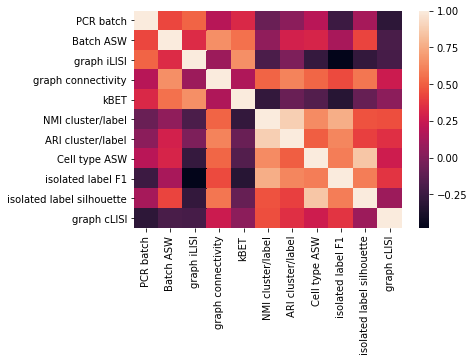

In [21]:
sns.heatmap(atac_corr)

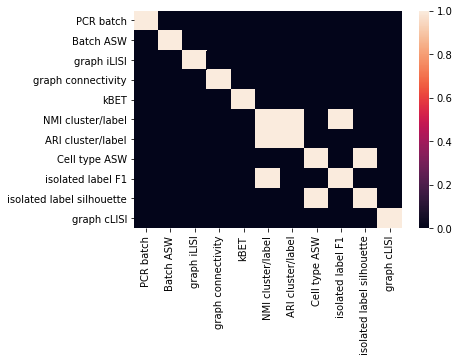

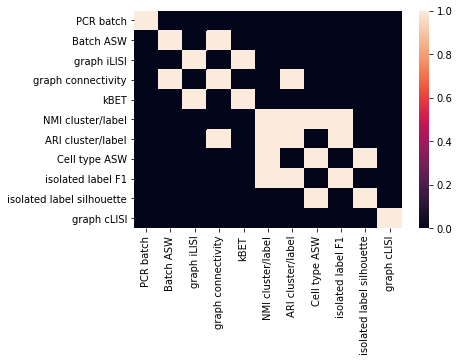

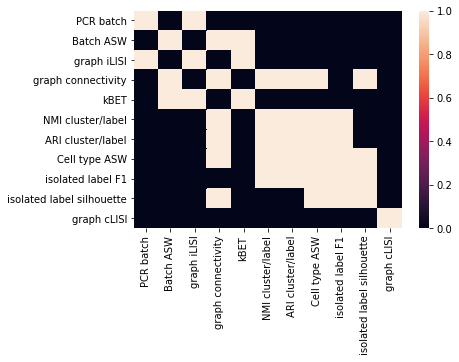

In [22]:
sns.heatmap(atac_corr > 0.7)
plt.show()

sns.heatmap(atac_corr > 0.6)
plt.show()

sns.heatmap(atac_corr > 0.5)
plt.show()

In [23]:
atac.describe()

,PCR batch,Batch ASW,graph iLISI,graph connectivity,kBET,NMI cluster/label,ARI cluster/label,Cell type ASW,isolated label F1,isolated label silhouette,graph cLISI
count,84.000000,84.000000,96.000000,96.000000,96.000000,96.000000,96.000000,84.000000,96.000000,84.000000,96.000000
mean,0.449078,0.810914,0.319319,0.925639,0.215686,0.541379,0.416449,0.550699,0.697352,0.493078,0.919411
std,0.364732,0.125244,0.185977,0.120273,0.176662,0.171455,0.198976,0.084317,0.247693,0.080600,0.114075
min,0.000000,0.447484,0.000000,0.533964,0.000000,0.162147,0.050342,0.208820,0.134503,0.200401,0.389638
25%,0.000000,0.745653,0.197559,0.945845,0.106777,0.401223,0.259836,0.525107,0.503480,0.482685,0.872614
50%,0.470736,0.834308,0.362627,0.981008,0.157634,0.553904,0.386583,0.549188,0.763776,0.506917,0.966812
75%,0.761289,0.914613,0.415491,0.992338,0.301909,0.694497,0.576816,0.604392,0.912875,0.532767,0.994569
max,0.999766,0.971783,0.762560,0.999748,0.642817,0.788624,0.809482,0.706901,0.990179,0.672062,1.000000


ATAC correlations are slightly higher, and (effective) ranges are a little lower, as methods perform poorly across the tasks.

However, NMI and ARI are not as highly correlated on ATAC data, as on RNA data (pearson r=0.88 instead of 0.93)